In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\USER\OneDrive - Amrita Vishwa Vidyapeetham\Documents\programing\python\tag\sem5\nasa_power_data_combined.csv",parse_dates=[0])

In [3]:
df.index=pd.to_datetime(df['Date'],format='%d.%m.%Y')

<Axes: xlabel='Date'>

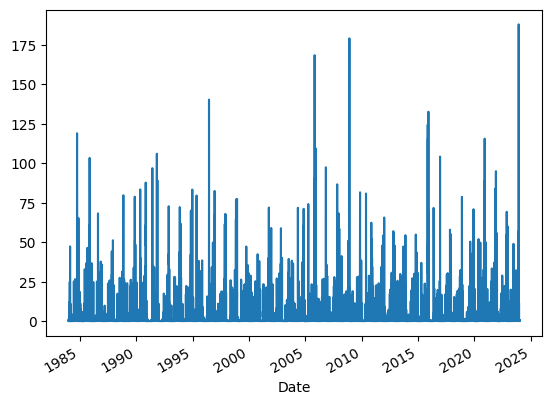

In [4]:
df['PRECTOTCORR'].plot()

In [5]:
print(df.shape)
columns_to_drop = df.columns[(df == -999).any()]
df.drop(columns=columns_to_drop,inplace=True)
print(df.shape)
print(df.shape)
columns_to_drop = df.columns[(df == 999).any()]
df.drop(columns=columns_to_drop,inplace=True)
print(df.shape)

(29222, 35)
(29222, 27)
(29222, 27)
(29222, 26)


In [6]:
df

,Date,Latitude,Longitude,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,PRECTOTCORR
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-01,1984-01-01,13.219032,80.017639,29.26,96.70,24.43,20.91,22.67,24.62,4.97,...,4.93,2.62,2.31,93.88,4.80,6.15,3.68,2.48,93.88,0.01
1984-01-02,1984-01-02,13.219032,80.017639,29.30,94.90,24.02,20.51,22.26,24.23,4.38,...,2.47,1.61,0.87,99.44,2.86,3.48,2.06,1.42,99.81,0.18
1984-01-03,1984-01-03,13.219032,80.017639,29.34,93.30,24.03,20.58,22.30,24.47,5.47,...,4.41,1.55,2.85,71.00,3.68,5.54,2.38,3.16,70.62,0.01
1984-01-04,1984-01-04,13.219032,80.017639,29.39,96.40,24.16,20.54,22.35,24.45,5.10,...,4.82,2.15,2.68,64.00,4.30,5.98,3.15,2.84,63.31,0.03
1984-01-05,1984-01-05,13.219032,80.017639,29.44,96.50,24.17,21.10,22.63,24.58,5.48,...,4.77,1.92,2.85,66.94,4.08,5.88,2.94,2.95,66.38,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,2023-12-28,12.719032,80.017639,29.70,93.30,25.65,22.95,24.30,25.85,4.78,...,5.56,3.85,1.71,33.44,5.93,7.02,5.02,2.00,32.88,0.83
2023-12-29,2023-12-29,12.719032,80.017639,29.73,80.41,25.71,22.78,24.24,25.85,4.36,...,5.70,3.88,1.82,38.88,5.87,7.16,5.05,2.11,38.31,0.75
2023-12-30,2023-12-30,12.719032,80.017639,29.75,99.37,24.94,21.26,23.10,25.17,4.37,...,4.84,3.13,1.70,40.38,5.06,6.05,4.21,1.84,40.00,0.16


C:\Users\USER\AppData\Local\Temp\ipykernel_2456\225101841.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
C:\Users\USER\AppData\Local\Temp\ipykernel_2456\225101841.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_y.index, y=corr_with_y.values, palette='coolwarm')


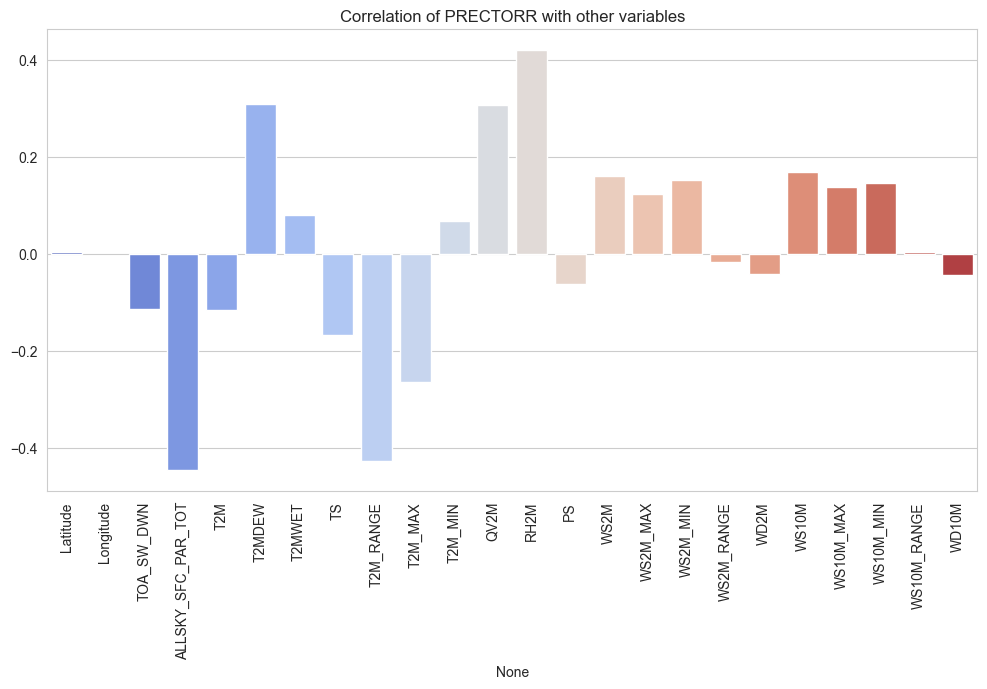

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

corr_matrix = df.corr()
corr_with_y = corr_matrix['PRECTOTCORR'].drop('PRECTOTCORR')# Drop the self-correlation (y with y)

sns.barplot(x=corr_with_y.index, y=corr_with_y.values, palette='coolwarm')

plt.title('Correlation of PRECTORR with other variables')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [8]:
def df_to_X_y(df,window_size):#Sliding window to label output for time series analysis
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size][-1]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
data_g= df.groupby(['Latitude', 'Longitude'])

In [10]:
split_date = '01-Jan-2022' 
for j,i in data_g:
    X,y=df_to_X_y(i,)
    print(X)
    print(X.shape,y.shape)

[[[[Timestamp('1984-01-01 00:00:00') 12.719032 80.017639 ... 1.97 88.5
    0.01]]

  [[Timestamp('1984-01-02 00:00:00') 12.719032 80.017639 ... 1.88 87.94
    1.27]]

  [[Timestamp('1984-01-03 00:00:00') 12.719032 80.017639 ... 3.05 63.88
    0.09]]

  ...

  [[Timestamp('1985-12-28 00:00:00') 12.719032 80.017639 ... 0.85 58.25
    0.02]]

  [[Timestamp('1985-12-29 00:00:00') 12.719032 80.017639 ... 1.95 51.94
    0.0]]

  [[Timestamp('1985-12-30 00:00:00') 12.719032 80.017639 ... 3.2 52.12
    0.0]]]


 [[[Timestamp('1984-01-02 00:00:00') 12.719032 80.017639 ... 1.88 87.94
    1.27]]

  [[Timestamp('1984-01-03 00:00:00') 12.719032 80.017639 ... 3.05 63.88
    0.09]]

  [[Timestamp('1984-01-04 00:00:00') 12.719032 80.017639 ... 2.59 60.25
    0.17]]

  ...

  [[Timestamp('1985-12-29 00:00:00') 12.719032 80.017639 ... 1.95 51.94
    0.0]]

  [[Timestamp('1985-12-30 00:00:00') 12.719032 80.017639 ... 3.2 52.12
    0.0]]

  [[Timestamp('1985-12-31 00:00:00') 12.719032 80.017639 ... 2.09 5

In [34]:
train= df[df['Date'] < split_date]
test = df[df['Date'] >= split_date]

val_size = int(0.5 * len(test))
val_df = test[:val_size]
test_df = test[val_size:]

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model= Sequential()
model.add(InputLayer((26,1)))
model.add(LSTM(64))
model.add(Dense (72, 'relu'))
model.add(Dense (52, 'relu'))
model.add(Dense (25, 'relu'))
model.add(Dense (12, 'relu'))
model.add(Dense (1, 'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 72)                4680      
                                                                 
 dense_6 (Dense)             (None, 52)                3796      
                                                                 
 dense_7 (Dense)             (None, 25)                1325      
                                                                 
 dense_8 (Dense)             (None, 12)                312       
                                                                 
 dense_9 (Dense)             (None, 1)                 13        
                                                                 
Total params: 27022 (105.55 KB)
Trainable params: 2702